# Stable diffusion

> Based on https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb#scrollTo=aIrgth7sqFML

In [ ]:
#| default_exp stable_diffusion

In [ ]:
#| export

import torch
from diffusers import StableDiffusionPipeline

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
%%time

# pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"
pretrained_model_name_or_path = "stabilityai/stable-diffusion-2-1"
revision = "fp16"
torch_dtype = torch.float16

pipe = StableDiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path, revision=revision, torch_dtype=torch_dtype
)

pipe

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

CPU times: user 359 ms, sys: 1.04 s, total: 1.4 s
Wall time: 2.66 s


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.11.1",
  "feature_extractor": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
%%time

pipe = pipe.to("cuda")

CPU times: user 818 ms, sys: 446 ms, total: 1.26 s
Wall time: 1.28 s


In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 15.3 s, sys: 2.56 s, total: 17.9 s
Wall time: 17.1 s


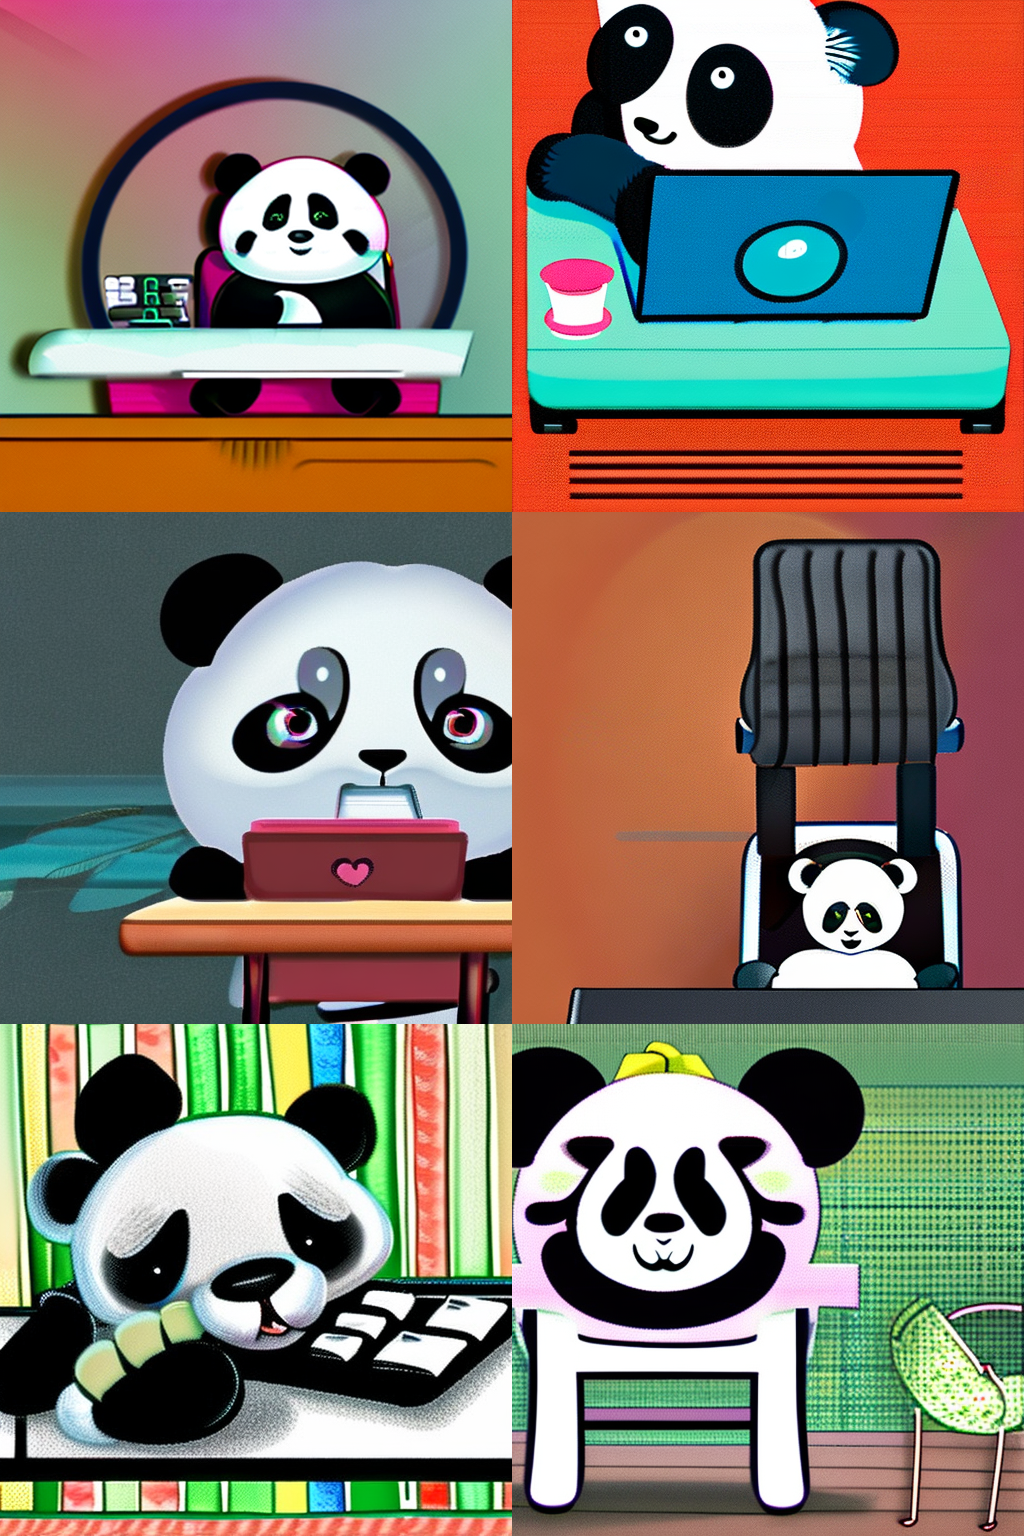

In [ ]:
%%time

generator = torch.Generator("cuda").manual_seed(43)

# prompt = "an award winning prohotgraph of an astronaut riding a horse in sunset by a river taken with Fuji xt-30, saturated colors"
prompt = "an illustration of a cute panda typing on a keyboard while sitting on a high chair"
negative_prompt = None
height = 512
width = 512
num_inference_steps = 50
guidance_scale = 7.5
rows = 3
cols = 2
num_images_per_prompt = rows * cols

retval = pipe(
    prompt,
    height=height,
    width=width,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    negative_prompt=negative_prompt,
    generator=generator
)
images = retval.images
grid = image_grid(images, rows=rows, cols=cols)
grid
# for image in images:
#  display(image)  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)